In [16]:
import math
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict

In [17]:
# First, let's plot the loss per epoch. We are given a list of losses per batch 
# iteration so we must take the average of all the iterations in a given epoch.
data_size = 1000000    # Length of UDC train dataset
batch_size = 128       # Batch size used during training

loss_history = pickle.load(open('../results/dual_encoder/dual_encoder_loss_history.pkl','rb'))

In [18]:
# Compute the number of batches per epoch
batches_per_epoch = math.ceil(data_size / batch_size)

# Reconstruct losses per epoch
losses_per_epoch = []
for start in range(0, len(loss_history), batches_per_epoch):
    sl = loss_history[start:start+batches_per_epoch]
    current_loss = sum(sl) / len(sl)
    losses_per_epoch.append(current_loss)

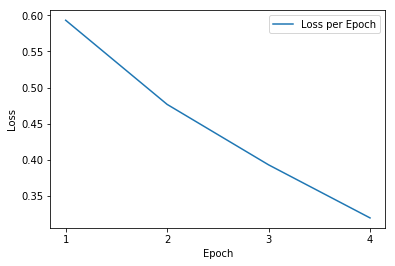

In [19]:
plt.plot(range(1, len(losses_per_epoch)), losses_per_epoch[:-1])
plt.xticks(range(1, len(losses_per_epoch)))
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.axvspan(3, len(losses_per_epoch[:-1]), alpha=0.3, color='red')
# plt.legend(['Loss per Epoch', 'Overfitting Span'])
plt.legend(['Loss per Epoch'])
plt.show()

In [20]:
result_history = pickle.load(open('../results/dual_encoder/dual_encoder_all_results.pkl', 'rb'))

In [21]:
all_results = defaultdict(list)
for epoch, results in result_history.items():
    for k, v in results.items():
        if k == 'recall@10':
            continue
        all_results[k] += [v]

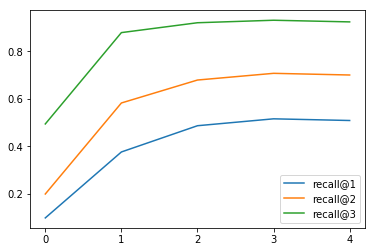

In [22]:
for k, v in all_results.items():
    plt.plot(list(range(0, 5)), v) 
plt.xticks(range(0, len(losses_per_epoch)))
plt.legend(['recall@1', 'recall@2', 'recall@3'])
plt.show()